In [1]:
import cv2
import numpy as np
import os

In [39]:
imPath = './smart/'
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath, imName))
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('frame',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

In [3]:
vidPath = '../Images/soccer.mp4'

In [49]:
cap = cv2.VideoCapture(vidPath)
while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame,dsize=(600,400))
    cv2.imshow('frame',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [5]:
B = cv2.imread('./smart/500_001.jpg')
I = cv2.imread('./smart/500_022.jpg')

In [7]:
import matplotlib.pyplot as plt

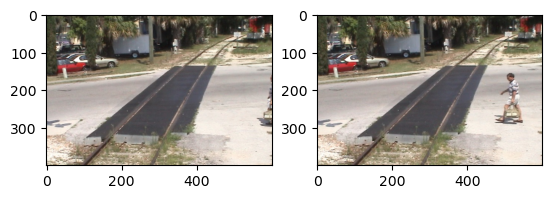

In [9]:
plt.subplot(121)
plt.imshow(B[:,:,::-1])
plt.subplot(122)
plt.imshow(I[:,:,::-1])

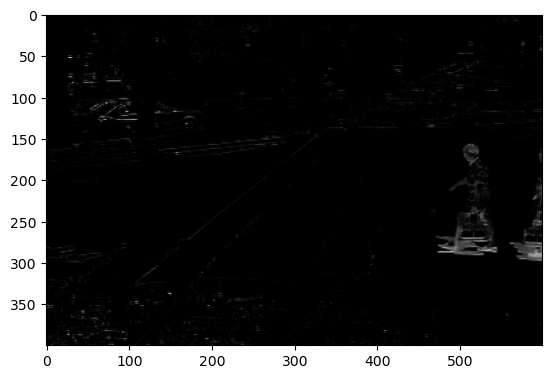

In [19]:
C = (np.float32(B)-np.float32(I))**2
C2 = np.sum(C,axis=2)
plt.imshow(C2,cmap='gray')

In [21]:
C2.max(),C2.mean()

(166889.0, 1395.7418)

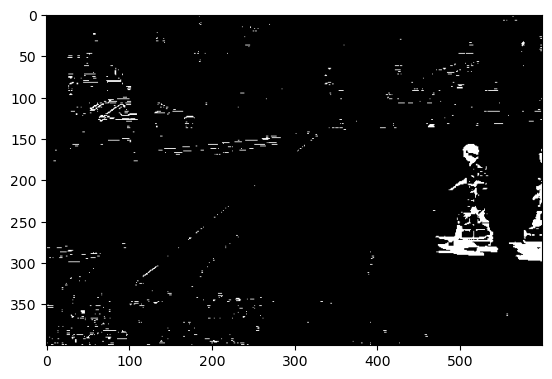

In [27]:
plt.imshow(C2>C2.mean()+2*C2.std(),cmap='gray')

In [39]:
def f_keepLargeComponents(I,th):
    R = np.zeros(I.shape)<0
    unique_labels = np.unique(I.flatten())
    for label in unique_labels:
        if label == 0:
            pass
        else:
            I2 = I == label
            if np.sum(I2)>th:
                R = R|I2
    return np.float32(255*R)

In [37]:
# Background Subtraction Detection of Objects
imPath = './Campus/'
fgModel = cv2.createBackgroundSubtractorMOG2()
for imName in os.listdir(imPath):
    frame = cv2.imread(os.path.join(imPath, imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels, labels_img = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1], F[:,:,2] = fgmask,fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('frame',F2)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cv2.destroyAllWindows()

In [73]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
def f_saveSeq(C,counter,th,outputPath):
    if len(C)<th:
        pass
    else:
        k = 1
        for frame in C:
            imName = str(counter) + '_' + str(k) + '.jpg'
            finalPath = os.path.join(outputPath,imName)
            bbox,labels,conf = cv.detect_common_objects(frame)
            frame = draw_bbox(frame,bbox,labels,conf)
            cv2.imwrite(finalPath,frame)
            k += 1

In [79]:
# Background Subtraction Detection of Objects
imPath = './Campus/'
fgModel = cv2.createBackgroundSubtractorMOG2()
leastNumOfFrames = 5
idx = []
C = []
counter = 0
outputPath = './CampusOut/'
for imName in os.listdir(imPath):
    counter += 1
    frame = cv2.imread(os.path.join(imPath, imName))
    frame = cv2.resize(frame,dsize=(600,400))
    fgmask = fgModel.apply(frame)
    K_r = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    fgmask = cv2.morphologyEx(np.float32(fgmask),cv2.MORPH_OPEN,K_r)
    num_labels, labels_img = cv2.connectedComponents(np.array(fgmask>0,np.uint8))
    fgmask = f_keepLargeComponents(labels_img,1000)
    if np.sum(fgmask)>0:
        idx.append(counter)
        C.append(frame)
    if len(idx)>=2 and idx[-1]>idx[-2]+1:
        f_saveSeq(C,counter,leastNumOfFrames,outputPath)
        idx = []
        C = []
    F = np.zeros(frame.shape,np.uint8)
    F[:,:,0],F[:,:,1], F[:,:,2] = fgmask,fgmask,fgmask
    F2 = np.hstack((frame,F))
    cv2.imshow('frame',F2)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break

f_saveSeq(C,counter,leastNumOfFrames,outputPath)
cv2.destroyAllWindows()

In [65]:
def f_displaySeq(outputPath):
    for imName in os.listdir(outputPath):
        frame = cv2.imread(os.path.join(outputPath,imName))
        frame = cv2.resize(frame,dsize=(600,400))
        cv2.imshow('frame',frame)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cv2.destroyAllWindows()

In [ ]:
pth = './CampusOut/'
f_displaySeq(pth)